In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Загрузка предварительно обученной модели VGG16

In [2]:
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 5s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
files.upload()

Saving 123.jpg to 123.jpg


{'123.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 92\n\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x048\x07\x80\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x

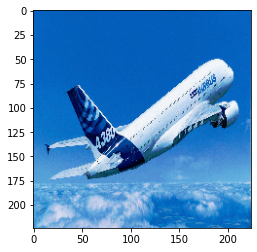

In [5]:
filename = '123.jpg'
img = image.load_img(filename, target_size=(224, 224))
plt.imshow(img)
plt.show()

Преобразование картинки в массив

In [6]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Распознование

In [7]:
preds = model.predict(x)

In [8]:
preds

array([[1.33443005e-11, 4.08054909e-11, 4.25288382e-09, 3.33142913e-09,
        7.17814164e-09, 6.71095124e-11, 3.69637350e-12, 3.61052637e-12,
        7.73055665e-13, 2.43779010e-13, 8.11997876e-13, 7.78608168e-12,
        4.01513892e-12, 7.93616648e-12, 1.43843340e-11, 3.10702175e-13,
        4.25246383e-12, 7.95168098e-12, 3.91544089e-11, 6.65583951e-12,
        3.16552557e-12, 2.10644141e-10, 1.88378358e-11, 1.56482230e-10,
        6.49820746e-13, 2.31332987e-12, 3.30766352e-11, 4.56992603e-12,
        8.82993711e-13, 3.82885433e-12, 2.44891862e-13, 6.49895123e-13,
        3.04705452e-13, 4.13057921e-11, 4.97109853e-10, 1.88105391e-12,
        1.59155621e-12, 7.84392286e-14, 1.08220084e-12, 2.73242648e-12,
        9.26641034e-13, 2.12127150e-13, 4.01624177e-12, 2.04122499e-13,
        4.62560925e-13, 3.36934853e-13, 4.60805927e-13, 2.94950262e-12,
        3.08643763e-13, 5.94337473e-14, 7.90267428e-13, 4.39551139e-11,
        4.03801775e-12, 1.13221377e-11, 6.23577416e-13, 8.850423

In [9]:
print('Результаты распознавания:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Результаты распознавания: [('n02690373', 'airliner', 0.88042605), ('n04592741', 'wing', 0.07795602), ('n02692877', 'airship', 0.037969332)]
